In [22]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


In [2]:
# Set random seed for reproducibility
np.random.seed(2)
tf.random.set_seed(2)

In [8]:
# Load the dataset
data = pd.read_csv('creditcard.csv')

In [10]:
print(data.head())
print(f"Number of transactions: {len(data)}")
print(data.describe())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

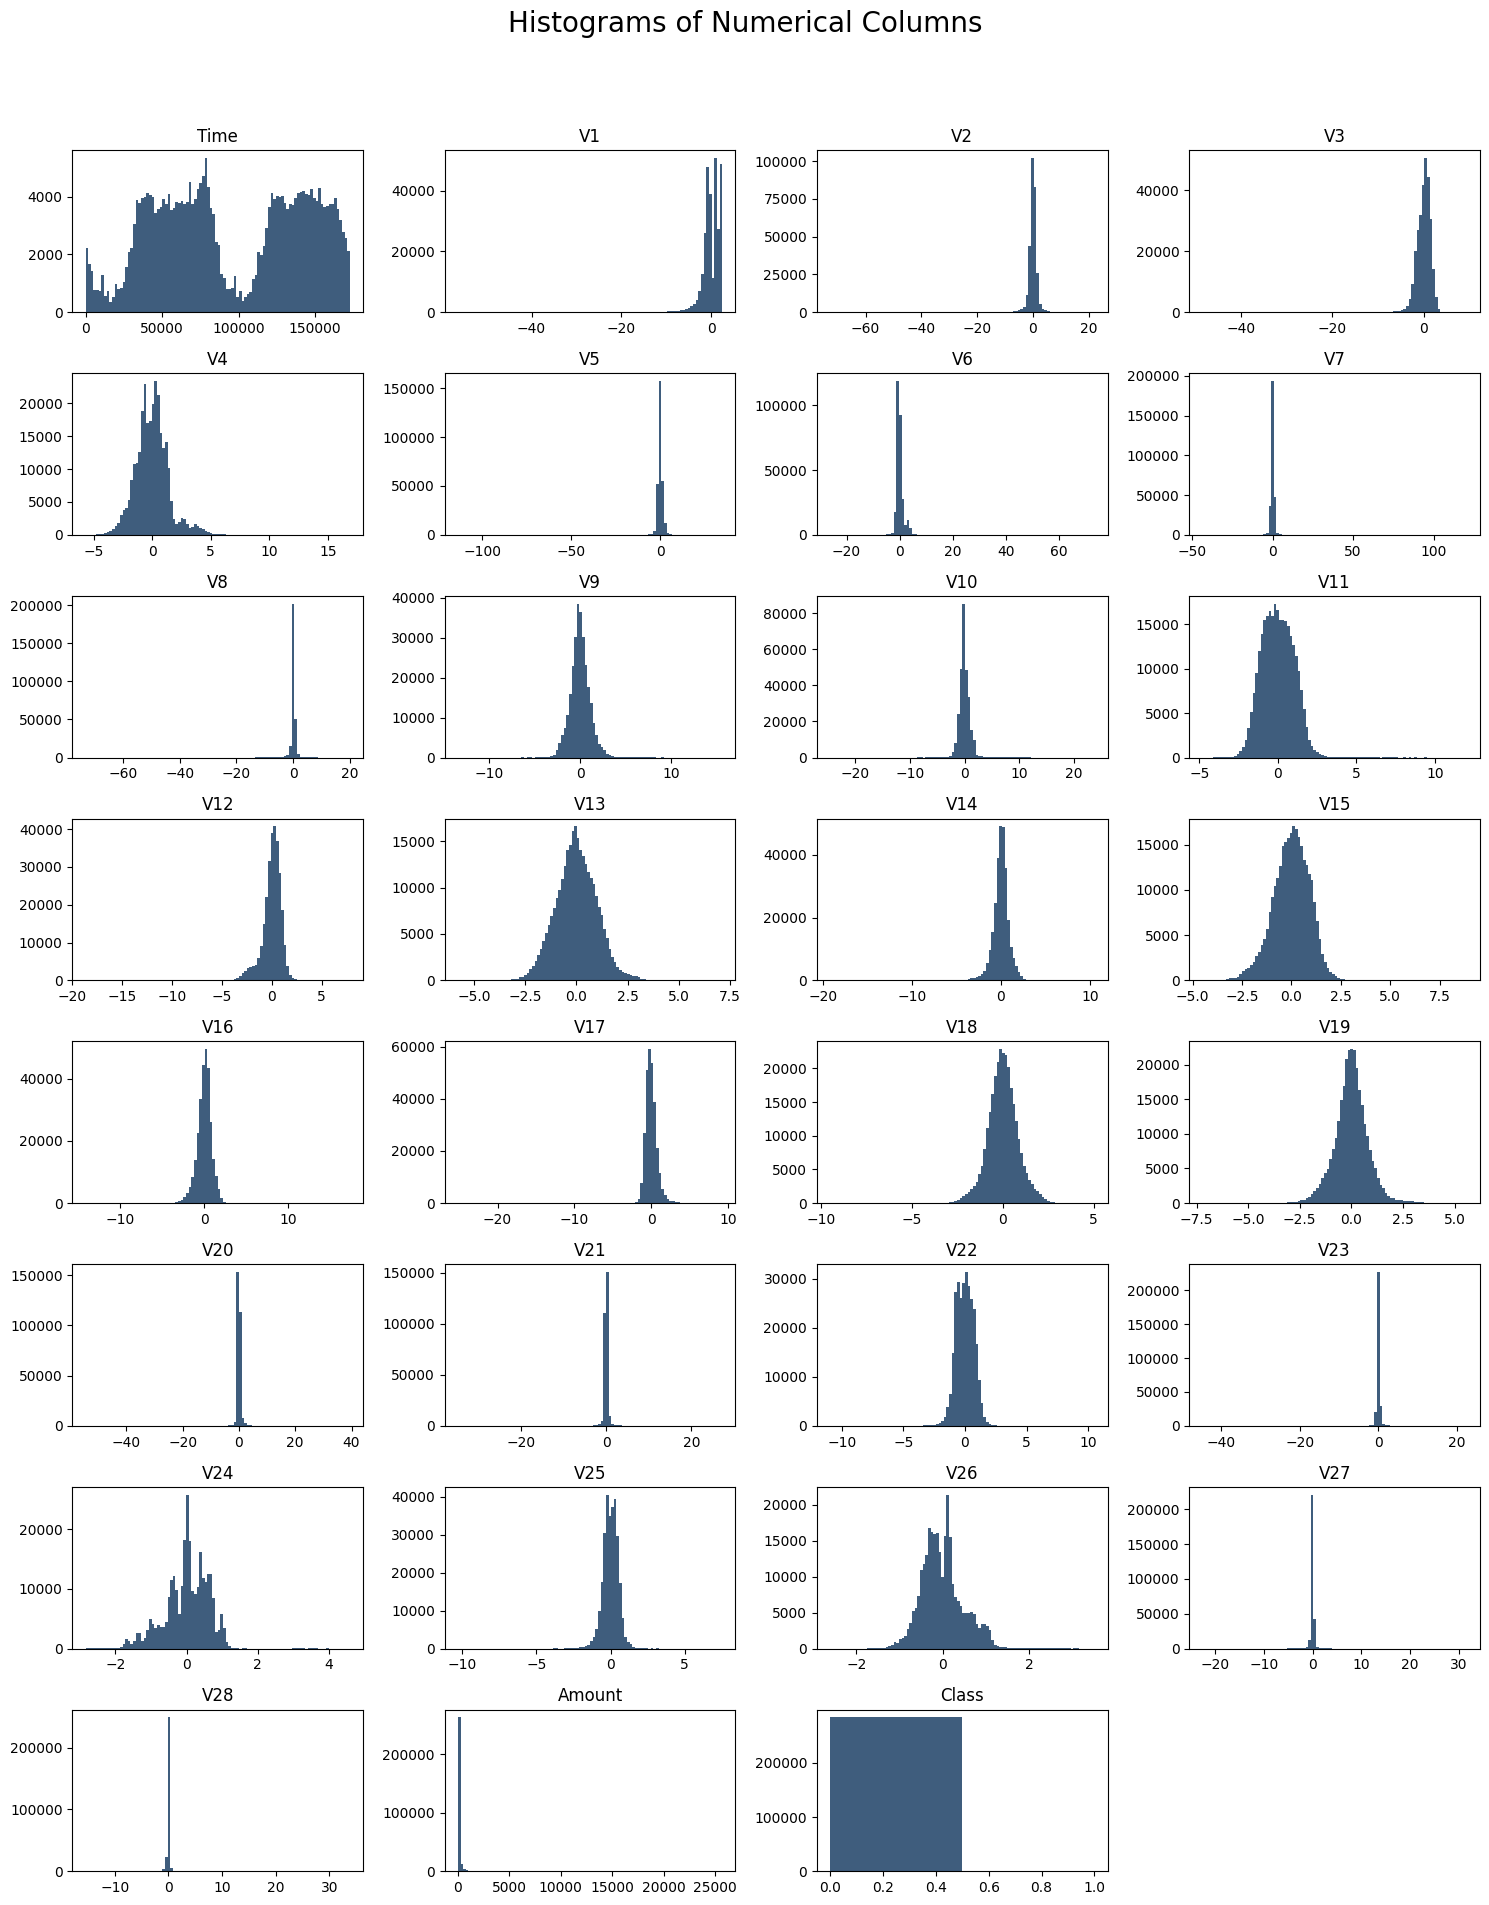

In [11]:
# Histograms of numerical columns
fig = plt.figure(figsize=(15, 20))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(data.shape[1]):
    plt.subplot(8, 4, i + 1)
    f = plt.gca()
    f.set_title(data.columns.values[i])
    vals = np.size(data.iloc[:, i].unique())
    if vals >= 100:
        vals = 100  # limit our bins to 100 maximum
    plt.hist(data.iloc[:, i], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [12]:
# Number of fraudulent transactions
num_fraud = len(data[data.Class == 1])
print(f'Number of fraudulent transactions = {num_fraud} or {num_fraud / len(data) * 100000:.2f} per 100,000 transactions in the dataset')


Number of fraudulent transactions = 492 or 172.75 per 100,000 transactions in the dataset


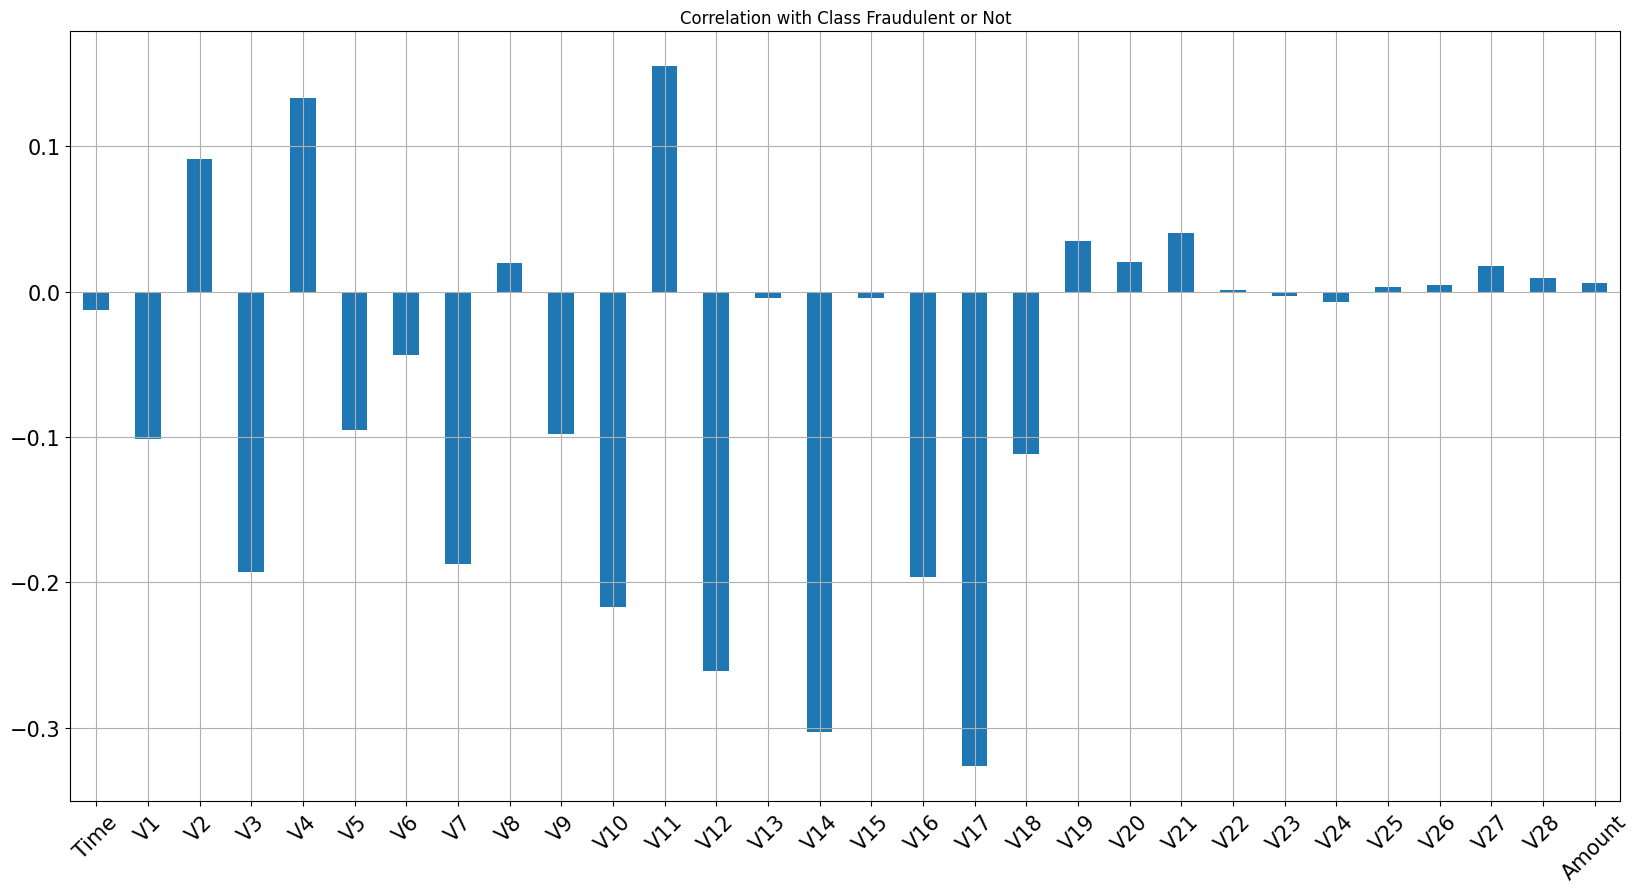

In [13]:
# Correlation with Response Variable
data2 = data.drop(columns=['Class'])
data2.corrwith(data.Class).plot.bar(figsize=(20, 10), title="Correlation with Class Fraudulent or Not", fontsize=15, rot=45, grid=True)
plt.show()

In [14]:
# Normalize the 'Amount' feature
scaler = StandardScaler()
data['normalizedAmount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))
data = data.drop(['Amount', 'Time'], axis=1)

In [15]:
# Split the data into features and target
X = data.drop('Class', axis=1)
y = data['Class']

In [16]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [17]:
# Model 1: Neural Network
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

c:\Users\USER\miniconda3\envs\swara\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9764 - loss: 0.0610 - val_accuracy: 0.9994 - val_loss: 0.0035
Epoch 2/10
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9992 - loss: 0.0051 - val_accuracy: 0.9995 - val_loss: 0.0033
Epoch 3/10
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9993 - loss: 0.0042 - val_accuracy: 0.9995 - val_loss: 0.0033
Epoch 4/10
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9992 - loss: 0.0039 - val_accuracy: 0.9994 - val_loss: 0.0032
Epoch 5/10
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9994 - loss: 0.0037 - val_accuracy: 0.9994 - val_loss: 0.0032
Epoch 6/10
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9993 - loss: 0.0035 - val_accuracy: 0.9995 - val_loss: 0.0029
Epoch 7/10
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9993 - loss: 0.0036 - val_accuracy: 0.9994 - val_loss: 0.0032
Epoch 8/10
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9994 - loss: 0.0037 -

In [18]:
# Evaluate Neural Network
y_pred_nn = model.predict(X_test).round()
acc_nn = accuracy_score(y_test, y_pred_nn)
prec_nn = precision_score(y_test, y_pred_nn)
rec_nn = recall_score(y_test, y_pred_nn)
f1_nn = f1_score(y_test, y_pred_nn)
roc_auc_nn = roc_auc_score(y_test, y_pred_nn)
print(f"Neural Network - Accuracy: {acc_nn}, Precision: {prec_nn}, Recall: {rec_nn}, F1 Score: {f1_nn}, ROC-AUC: {roc_auc_nn}")


2671/2671 ━━━━━━━━━━━━━━━━━━━━ 2s 857us/step
Neural Network - Accuracy: 0.9994616293903538, Precision: 0.8854961832061069, Recall: 0.7891156462585034, F1 Score: 0.8345323741007195, ROC-AUC: 0.8944698940352732


In [19]:
# Model 2: XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
prec_xgb = precision_score(y_test, y_pred_xgb)
rec_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_xgb)
print(f"XGBoost - Accuracy: {acc_xgb}, Precision: {prec_xgb}, Recall: {rec_xgb}, F1 Score: {f1_xgb}, ROC-AUC: {roc_auc_xgb}")


c:\Users\USER\miniconda3\envs\swara\lib\site-packages\xgboost\core.py:158: UserWarning: [22:42:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Accuracy: 0.9995786664794073, Precision: 0.944, Recall: 0.8027210884353742, F1 Score: 0.8676470588235294, ROC-AUC: 0.901319510640497


In [20]:
# Model 3: LightGBM
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)
acc_lgbm = accuracy_score(y_test, y_pred_lgbm)
prec_lgbm = precision_score(y_test, y_pred_lgbm)
rec_lgbm = recall_score(y_test, y_pred_lgbm)
f1_lgbm = f1_score(y_test, y_pred_lgbm)
roc_auc_lgbm = roc_auc_score(y_test, y_pred_lgbm)
print(f"LightGBM - Accuracy: {acc_lgbm}, Precision: {prec_lgbm}, Recall: {rec_lgbm}, F1 Score: {f1_lgbm}, ROC-AUC: {roc_auc_lgbm}")


[LightGBM] [Info] Number of positive: 345, number of negative: 199019
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.028925 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001731 -> initscore=-6.357611
[LightGBM] [Info] Start training from score -6.357611
LightGBM - Accuracy: 0.9950025162974147, Precision: 0.19827586206896552, Recall: 0.6258503401360545, F1 Score: 0.3011456628477905, ROC-AUC: 0.8107445285373576


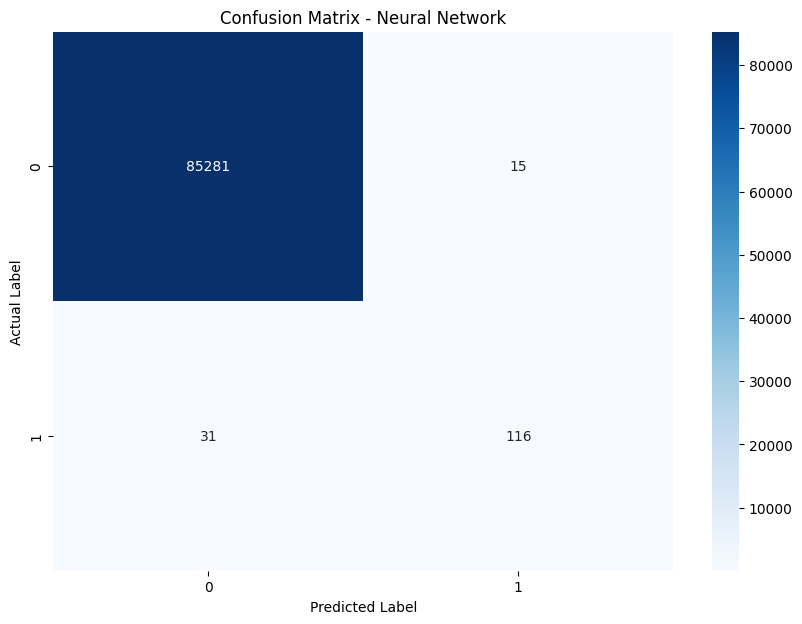

In [23]:
# Confusion Matrix for Neural Network
cnf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
plt.figure(figsize=(10, 7))
sns.heatmap(cnf_matrix_nn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Neural Network')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


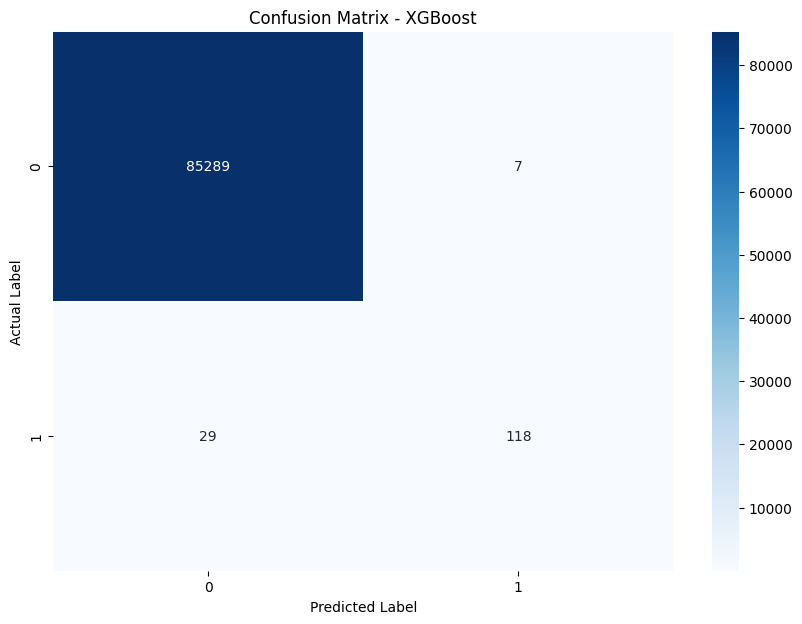

In [24]:
# Confusion Matrix for XGBoost
cnf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(10, 7))
sns.heatmap(cnf_matrix_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


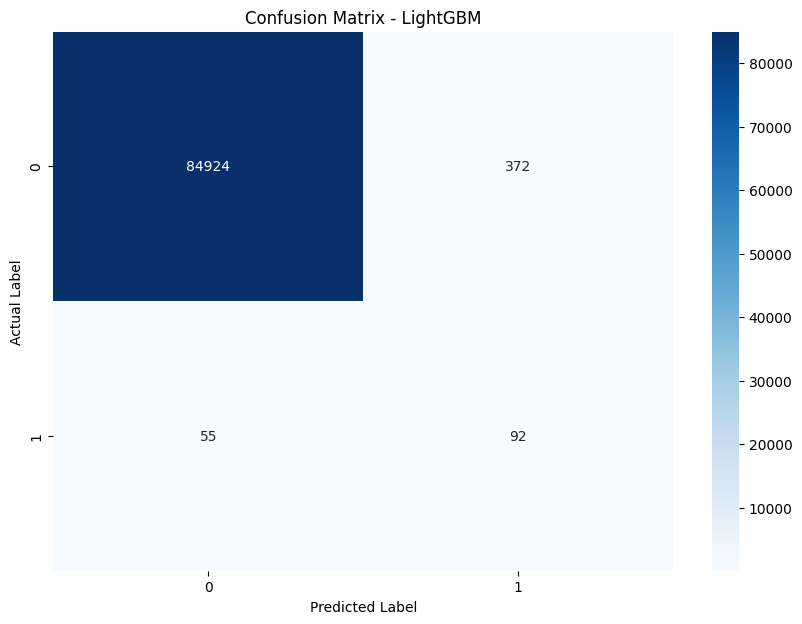

In [25]:
# Confusion Matrix for LightGBM
cnf_matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)
plt.figure(figsize=(10, 7))
sns.heatmap(cnf_matrix_lgbm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - LightGBM')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

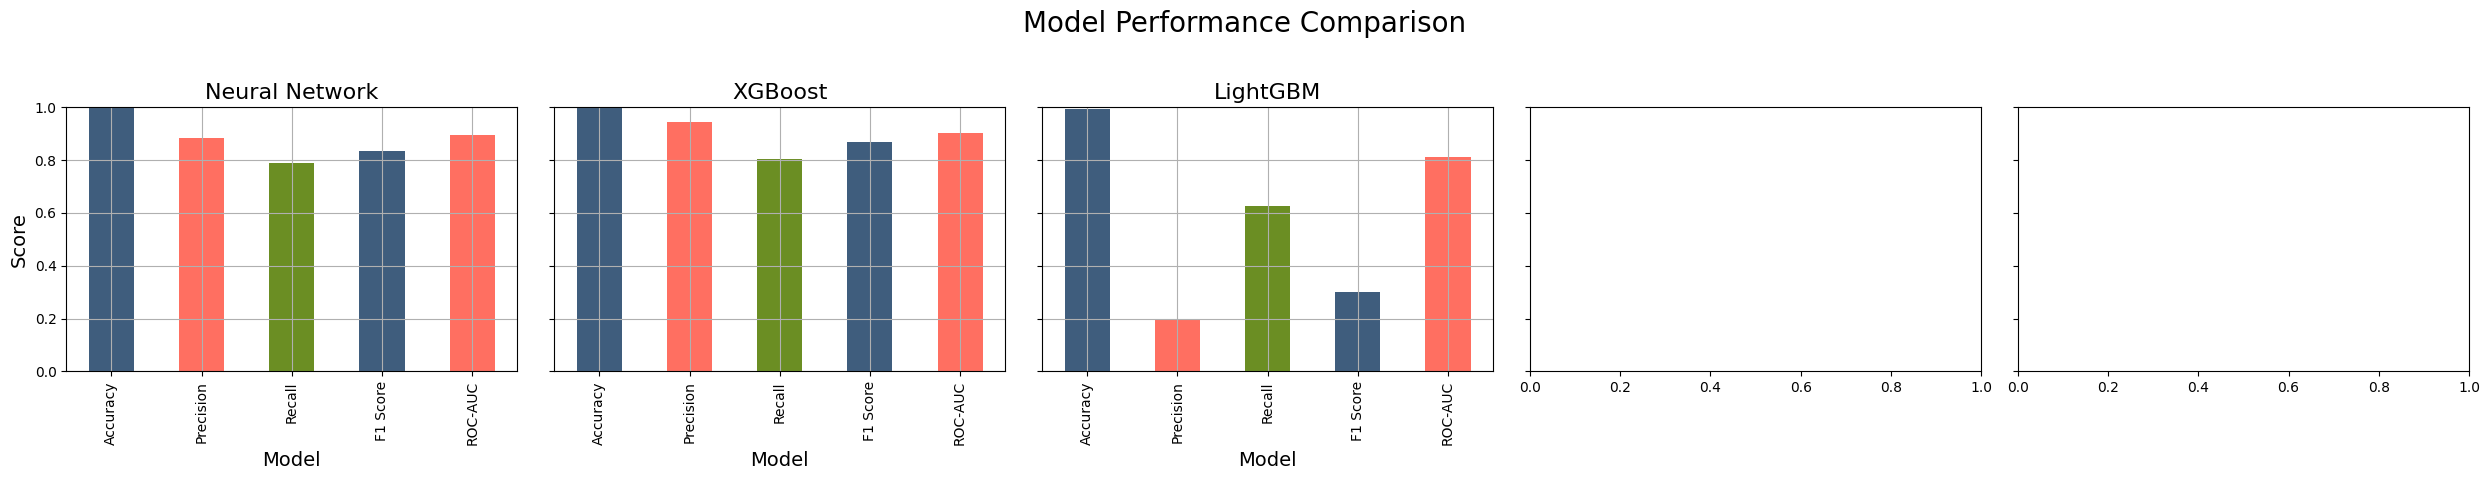

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the metrics for each model
metrics = {
    'Neural Network': {
        'Accuracy': acc_nn,
        'Precision': prec_nn,
        'Recall': rec_nn,
        'F1 Score': f1_nn,
        'ROC-AUC': roc_auc_nn
    },
    'XGBoost': {
        'Accuracy': acc_xgb,
        'Precision': prec_xgb,
        'Recall': rec_xgb,
        'F1 Score': f1_xgb,
        'ROC-AUC': roc_auc_xgb
    },
    'LightGBM': {
        'Accuracy': acc_lgbm,
        'Precision': prec_lgbm,
        'Recall': rec_lgbm,
        'F1 Score': f1_lgbm,
        'ROC-AUC': roc_auc_lgbm
    }
}

# Convert metrics to DataFrame for easy plotting
df_metrics = pd.DataFrame(metrics)

# Plot bar charts for each metric
fig, axes = plt.subplots(1, 5, figsize=(25, 5), sharey=True)
fig.suptitle('Model Performance Comparison', fontsize=20)

metrics_names = list(df_metrics.columns)
for i, metric in enumerate(metrics_names):
    ax = axes[i]
    df_metrics[metric].plot(kind='bar', ax=ax, color=['#3F5D7D', '#FF6F61', '#6B8E23'])
    ax.set_title(metric, fontsize=16)
    ax.set_ylabel('Score', fontsize=14)
    ax.set_xlabel('Model', fontsize=14)
    ax.set_ylim([0, 1])
    ax.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
